# Chapter 07 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Resampling Steps

 Implement resampling steps

In [3]:
box = [1] * 4 + [0] * 16
nr_ones = []
for _ in range(1000):
    resample = random.choices(box, k=20)
    nr_ones.append(sum(resample))
ci_interval = np.quantile(nr_ones, [0.05, 0.95]) / 20 * 100
print(f"90% confidence interval: {ci_interval}")

90% confidence interval: [ 5. 35.]


# Binomial Formula

 Implement binomial formula

In [4]:
from scipy.special import comb
n = 5
p = 0.3
x = 3
prob = comb(n, x) * p**x * (1-p)**(n-x)
print(f"Probability of {x} successes in {n} trials with probability {p} of success: {prob:.3f}")

Probability of 3 successes in 5 trials with probability 0.3 of success: 0.132


 Use scipy to calculate probability

In [5]:
from scipy.stats import binom
prob = binom.pmf(x, n, p)
print(f"Probability of {x} successes in {n} trials with probability {p} of success: {prob:.3f}")

Probability of 3 successes in 5 trials with probability 0.3 of success: 0.132


 Use resampling to generate probabilities

In [6]:
random.seed(123)
box = [1] * 3 + [0] * 7
success_counts = np.array([0] * 6)
for _ in range(1000):
    success = sum(random.choices(box, k=5))
    success_counts[success] += 1
resample_prob = success_counts / 1000

 Cumulative probabilities

In [7]:
from scipy.stats import binom
n = 5
p = 0.3
df = pd.DataFrame({
    "successes": range(n+1),
    "probability": binom.pmf(range(n+1), n, p),
    "cum. prob.": binom.cdf(range(n+1), n, p),
    "inv. cum. prob.": binom.sf(range(n+1), n, p),
    "prob. resample": resample_prob,
})
print(df.round(3))

   successes  probability  cum. prob.  inv. cum. prob.  prob. resample
0          0        0.168       0.168            0.832           0.158
1          1        0.360       0.528            0.472           0.376
2          2        0.309       0.837            0.163           0.301
3          3        0.132       0.969            0.031           0.133
4          4        0.028       0.998            0.002           0.029
5          5        0.002       1.000            0.000           0.003


 Plot distribution

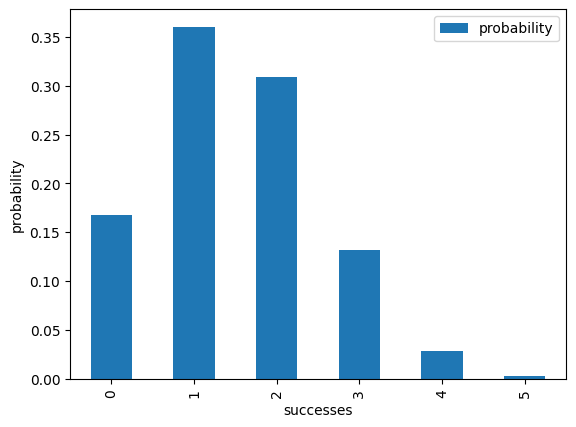

In [8]:
fig, ax = plt.subplots()
df.plot.bar(x="successes", y="probability", ax=ax)
ax.set_xlabel("successes")
ax.set_ylabel("probability")
plt.show()

 Example: vendor differences

 Load and preprocess the data

In [9]:
data = pd.read_csv("vendors.txt", header=None)
vendorA = data[0].to_numpy()[:12]
vendorB = data[0].to_numpy()[12:]
print(vendorA, vendorB)
print(vendorA.mean().round(2), vendorB.mean().round(2))

[14.2 15.1 13.9 12.8 13.7 14.  13.5 14.3 14.9 13.1 13.4 13.2] [12.4 13.6 14.6 12.8 11.9 13.1 12.8 13.2 14.7 14.5]
13.84 13.36


 Implement resampling procedure for vendor differences

In [10]:
differences = []
for _ in range(1000):
    sampleA = random.choices(vendorA, k=len(vendorA))
    sampleB = random.choices(vendorB, k=len(vendorB))
    differences.append(np.mean(sampleA) - np.mean(sampleB))
ci_interval = np.quantile(differences, [0.05, 0.95])
print(f"90% confidence interval: {ci_interval.round(2)}")

90% confidence interval: [-0.1   1.08]


 Visualize the distribution

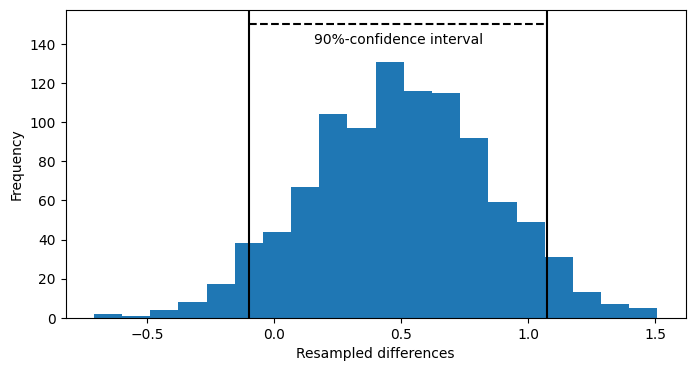

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(differences).plot.hist(bins=20, ax=ax)
ax.set_xlabel("Resampled differences")
ax.set_ylabel("Frequency")
for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [150, 150], color="black", linestyle="--")
ax.text(ci_interval.mean(), 140, "90%-confidence interval", ha="center")
plt.show()

 Calculate confidence interval using formula

In [12]:
nu = len(vendorA) + len(vendorB) - 2
t = stats.t.ppf(0.95, nu)
se = np.sqrt(vendorA.var() / len(vendorA) + vendorB.var() / len(vendorB))
ci_interval_2 = (vendorA.mean() - vendorB.mean()) + np.array([-1, 1]) * t * se
print(f"90% confidence interval: {ci_interval_2.round(2)}")

90% confidence interval: [-0.12  1.09]


# Example: Cholesterol and Heart Attacks

 Implement resampling approach

In [13]:
random.seed(123)
boxA = [1] * 10 + [0] * 125
boxB = [1] * 21 + [0] * 449
differences = []
for _ in range(1000):
    sampleA = random.choices(boxA, k=len(boxA))
    sampleB = random.choices(boxB, k=len(boxB))
    differences.append(np.mean(sampleA) - np.mean(sampleB))
differences = 100 * np.array(differences)  # convert to %
ci_interval = np.percentile(differences, [2.5, 97.5])
print(f"95% confidence interval: {ci_interval.round(2)}")

95% confidence interval: [-1.94  8.13]


 Plot histogram with confidence interval

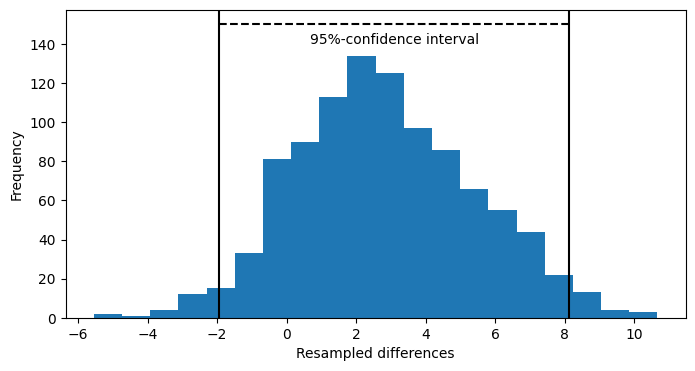

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(differences).plot.hist(bins=20, ax=ax)
ax.set_xlabel("Resampled differences")
ax.set_ylabel("Frequency")
for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [150, 150], color="black", linestyle="--")
ax.text(ci_interval.mean(), 140, "95%-confidence interval", ha="center")
plt.show()

# resampling procedure - parametric bootstrap

 Parametric bootstrap - version 1

In [15]:
rng = np.random.default_rng(seed=123)
random.seed(123)
mean_A = 13.84
std_A = 0.70
mean_B = 13.36
std_B = 0.97

boxA = stats.norm.rvs(mean_A, std_A, size=10_000, random_state=rng)
boxB = stats.norm.rvs(mean_B, std_B, size=10_000, random_state=rng)
differences_1 = []
for _ in range(1000):
    sample_A = random.choices(boxA, k=12)
    sample_B = random.choices(boxB, k=10)
    diff = np.mean(sample_A) - np.mean(sample_B)
    differences_1.append(diff)
ci_interval_1 = np.quantile(differences_1, [0.05, 0.95])

 Parametric bootstrap - version 2

In [16]:
differences_2 = []
for _ in range(1000):
    sample_A = stats.norm.rvs(mean_A, std_A, size=12, random_state=rng)
    sample_B = stats.norm.rvs(mean_B, std_B, size=10, random_state=rng)
    diff = np.mean(sample_A) - np.mean(sample_B)
    differences_2.append(diff)
ci_interval_2 = np.quantile(differences_2, [0.05, 0.95])

 Compare the two versions. The confidence intervals are similar

In [17]:
df = pd.DataFrame({"version 1": ci_interval_1, "version 2": ci_interval_2},
                  index=["lower", "upper"])
print(df)

       version 1  version 2
lower  -0.176737  -0.142021
upper   1.075523   1.045036


 Histogram of version 2 results with 90 percent confidence interval

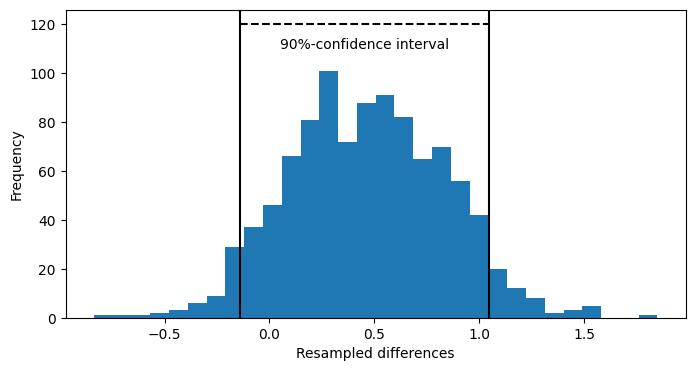

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(differences_2).plot.hist(bins=30, ax=ax)
ax.set_xlabel("Resampled differences")
ax.set_ylabel("Frequency")
for ci in ci_interval_2:
    ax.axvline(ci, color="black")
ax.plot(ci_interval_2, [120, 120], color="black", linestyle="--")
ax.text(ci_interval_2.mean(), 110, "90%-confidence interval", ha="center")
plt.show()